In [1]:
# Importing the Keras libraries and packages
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
import numpy as np
% matplotlib inline

Using TensorFlow backend.


In [2]:
def find_class(label_array,label_dict):
    index = label_array.argmax()
    for k in label_dict.keys():
        if label_dict[k] == index:
           return k


In [3]:
# Initialising the CNN
classifier = Sequential()

In [4]:
# Step 1 - Convolution
classifier.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(64,64,3))) 
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size=2))
# Step 3 - Dropout
classifier.add(Dropout(0.3))
# Steop 4 - Convolution
classifier.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
# Step 5 - Pooling
classifier.add(MaxPooling2D(pool_size=2))
# Step 6 - Dropout
classifier.add(Dropout(0.3))
####TEST####
classifier.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
classifier.add(MaxPooling2D(pool_size=2))
####END TEST####
# Step 7 - Flatten
classifier.add(Flatten())
# Steop 8 - FC Hidden Layers
classifier.add(Dense(1024, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(512, activation='relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(128, activation='relu'))
classifier.add(Dropout(0.1))
classifier.add(Dense(4, activation='softmax'))

In [5]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 64)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       16512     
__________

In [6]:
# Compiling the Model
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2,vertical_flip = True, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('training_set', target_size = (64, 64), batch_size = 32, class_mode = 'categorical',shuffle = True)
test_set = test_datagen.flow_from_directory('test_set', target_size = (64, 64), batch_size = 32, class_mode = 'categorical',shuffle = True)
label_map = (training_set.class_indices)

Found 2775 images belonging to 4 classes.
Found 692 images belonging to 4 classes.


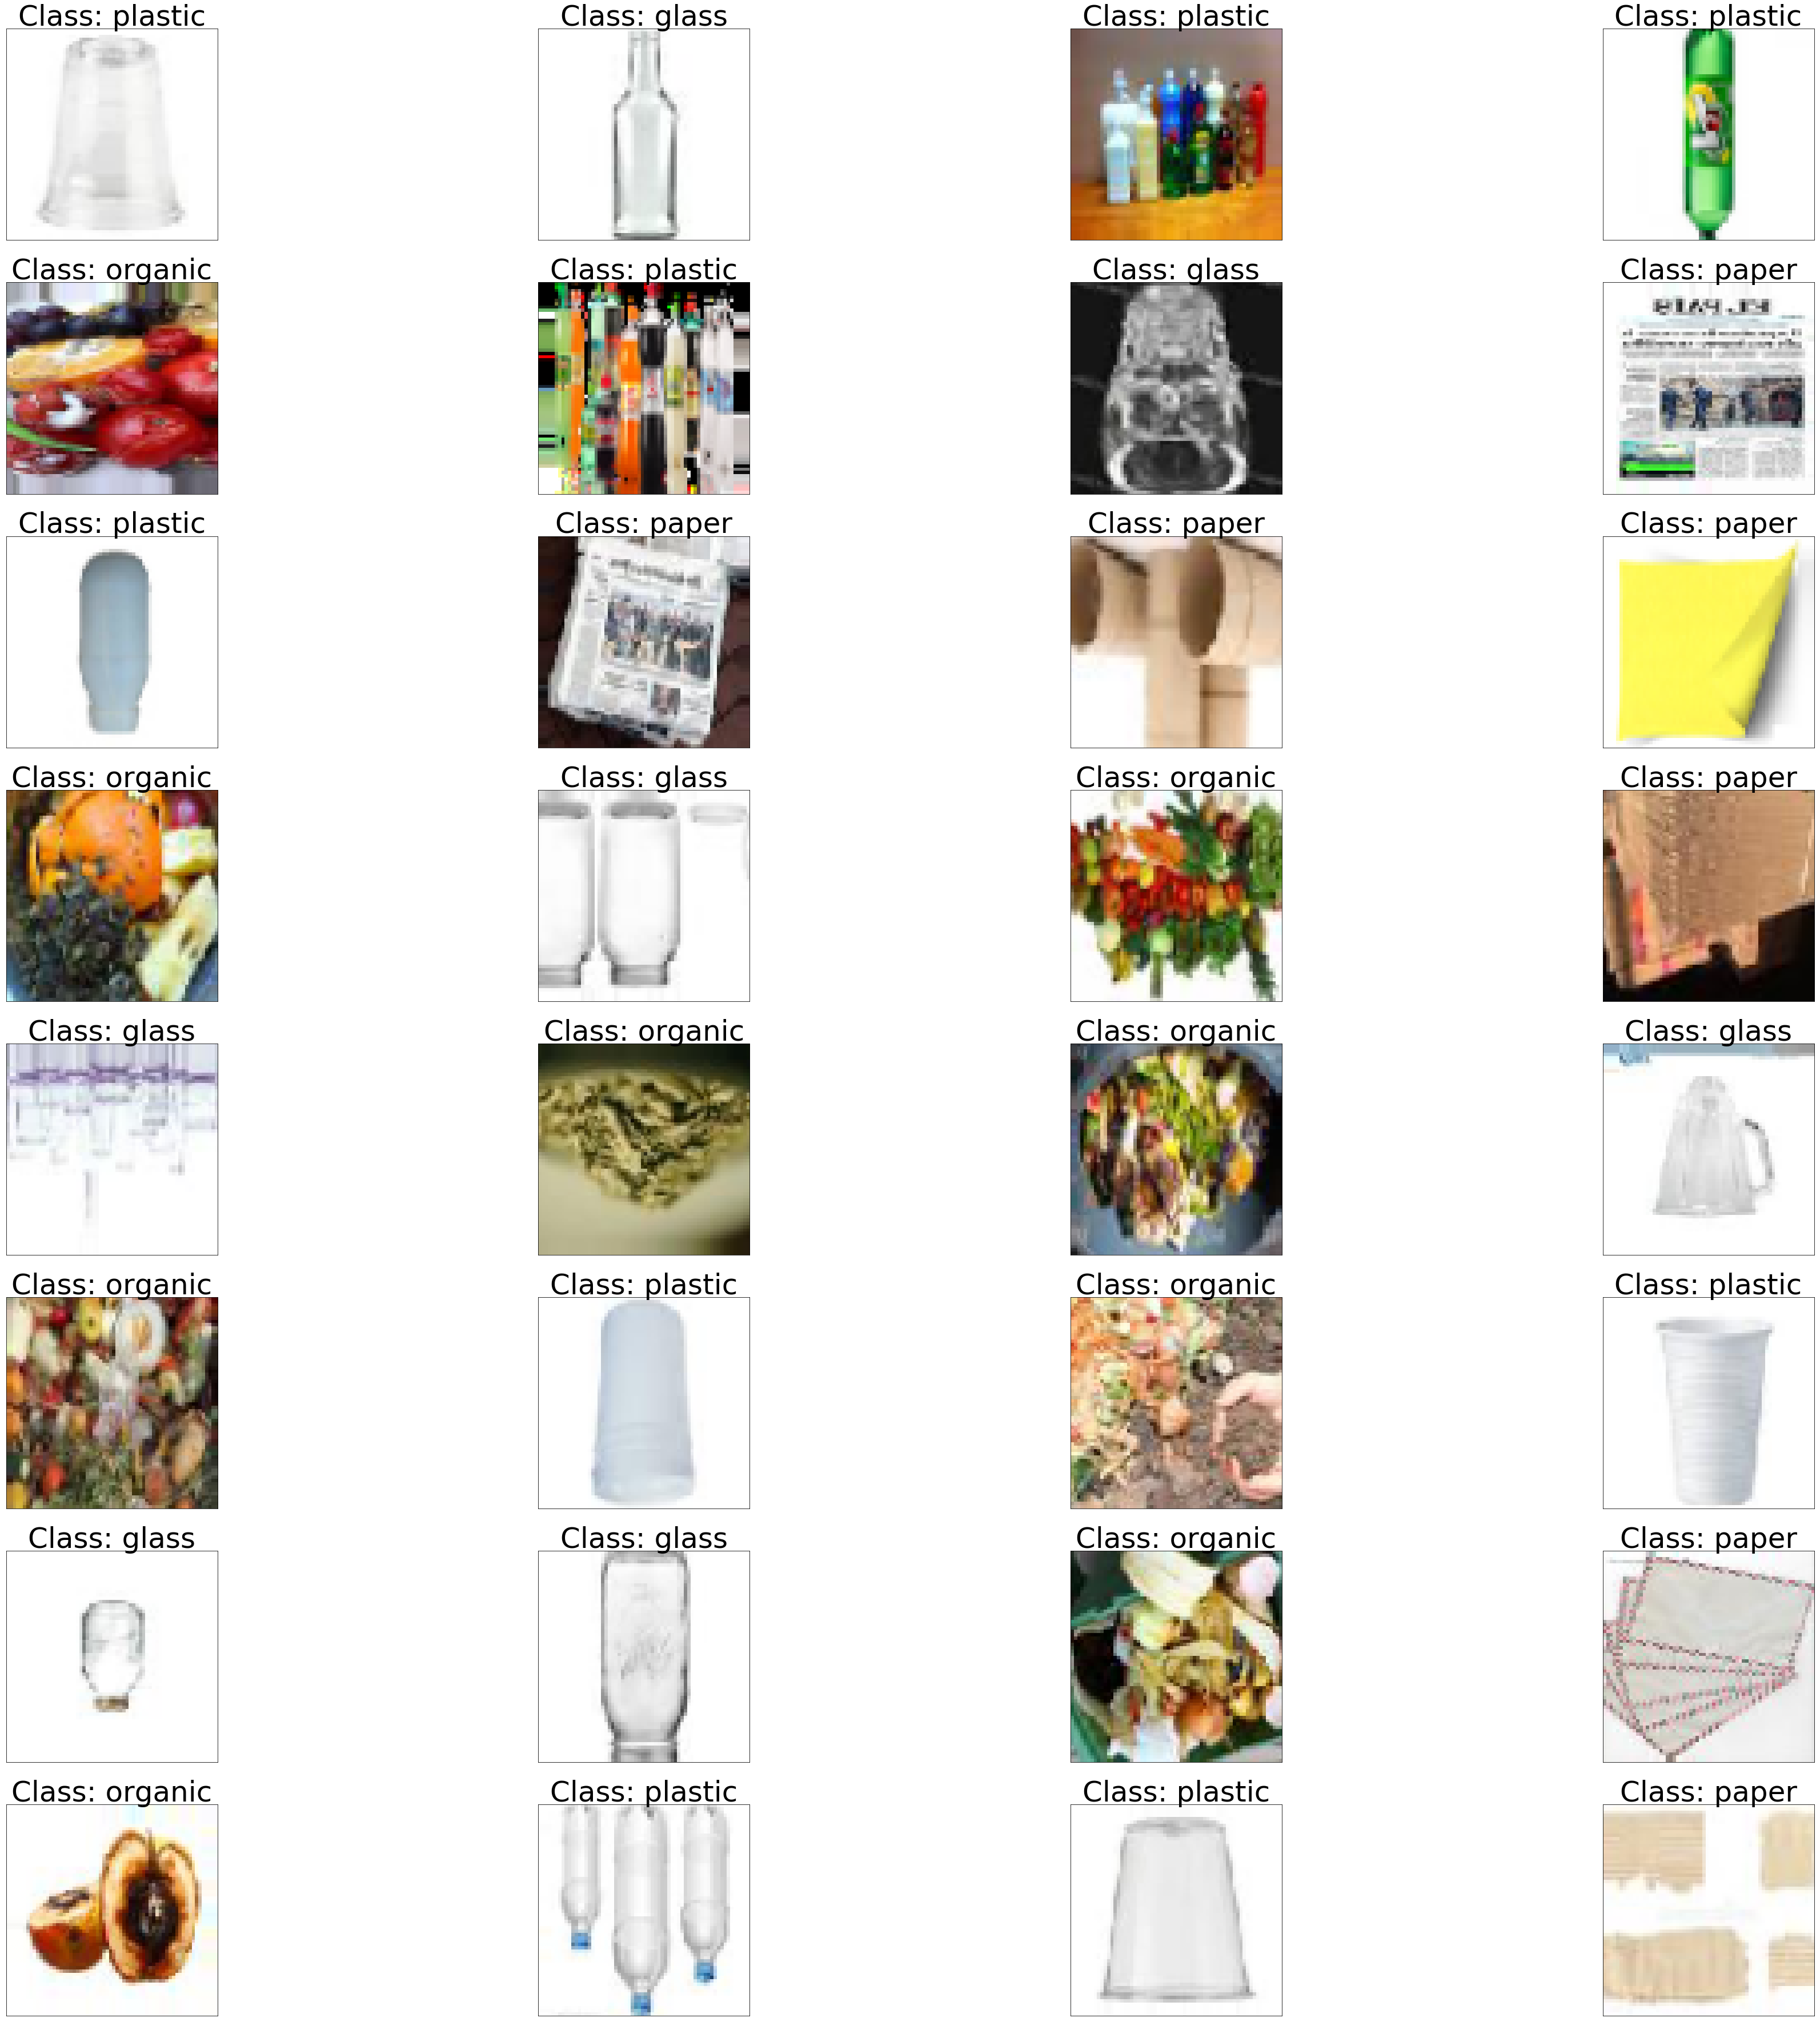

In [8]:
#Plot sample training set batch
x_batch, y_batch = next(training_set)
fig = plt.figure(figsize=(64,64))
for i in range (0,32):
    ax = fig.add_subplot(8, 4, 1 + i , xticks=[], yticks=[])
    im = x_batch[i]
    image_label = find_class(y_batch[i],label_map)
    ax.set_title("Class: " + image_label,fontsize = 50)
    plt.imshow(im)
plt.show()


In [16]:
# Setting callbacks
model_name = "weights.best.hdf5"
checkpoint = ModelCheckpoint(model_name, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=10, verbose=1, mode='auto')
callbacks_list = [checkpoint, early_stopping]

In [17]:
#Train
#https://stackoverflow.com/questions/43457862/whats-the-difference-between-samples-per-epoch-and-steps-per-epoch-in-fit-g
classifier = load_model('weights.best.hdf5')
model_history = classifier.fit_generator(
            training_set,
            steps_per_epoch = 2775/32,
            initial_epoch = 29,
            epochs=50,
            callbacks=callbacks_list,
            validation_steps = 692/32,
            validation_data=test_set)


Epoch 30/50
87/86 [==============================] - 57s 654ms/step - loss: 0.5421 - acc: 0.7752 - val_loss: 0.6835 - val_acc: 0.7616

Epoch 00030: val_acc improved from -inf to 0.76156, saving model to weights.best.hdf5
Epoch 31/50
87/86 [==============================] - 56s 646ms/step - loss: 0.5336 - acc: 0.7839 - val_loss: 0.6199 - val_acc: 0.7688

Epoch 00031: val_acc improved from 0.76156 to 0.76879, saving model to weights.best.hdf5
Epoch 32/50
87/86 [==============================] - 56s 647ms/step - loss: 0.5149 - acc: 0.7891 - val_loss: 0.7577 - val_acc: 0.7341

Epoch 00032: val_acc did not improve
Epoch 33/50
87/86 [==============================] - 55s 636ms/step - loss: 0.5245 - acc: 0.7939 - val_loss: 0.7492 - val_acc: 0.7168

Epoch 00033: val_acc did not improve
Epoch 34/50
87/86 [==============================] - 55s 634ms/step - loss: 0.4883 - acc: 0.7981 - val_loss: 0.7155 - val_acc: 0.7413

Epoch 00034: val_acc did not improve
Epoch 35/50
87/86 [====================

In [45]:
test_image_names=['glass_bottle.jpg','naranja.jpg','hamburger.jpg','desechos-organicos.jpg','plastic_bottle.jpg',
                  'embase_cocalight.jpg','soda-2-lts..jpg','sample_card_box.jpg','PEDAZO-DE-CARTON.jpg']

for image_name in test_image_names:
    test_image = image.load_img(image_name, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(test_image)
    index = result.argmax(1)[0]
    #label_map
    #type(label_map).__name__
    for k in label_map.keys():
        if label_map[k] == index:
            print("La imagen corresponde a la clase ", k)


La imagen corresponde a la clase  plastic
La imagen corresponde a la clase  organic
La imagen corresponde a la clase  organic
La imagen corresponde a la clase  organic
La imagen corresponde a la clase  plastic
La imagen corresponde a la clase  plastic
La imagen corresponde a la clase  plastic
La imagen corresponde a la clase  paper
La imagen corresponde a la clase  organic


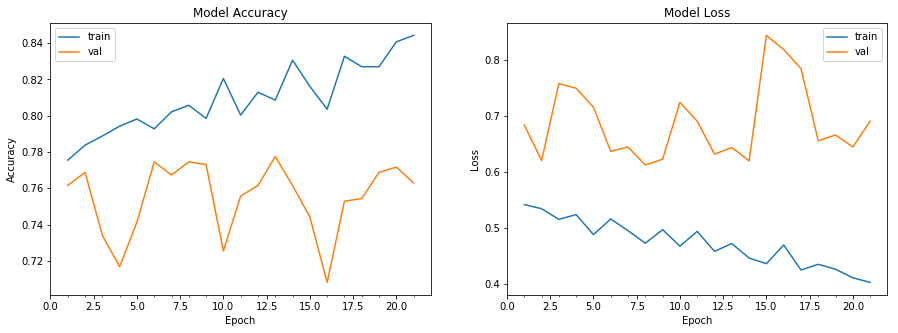

In [21]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
# summarize history for accuracy
axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
axs[0].legend(['train', 'val'], loc='best')
# summarize history for loss
axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
axs[1].legend(['train', 'val'], loc='best')
plt.show()

In [35]:
validation_set = test_datagen.flow_from_directory('test_set', target_size = (64, 64), batch_size = 1, class_mode = 'categorical',shuffle = False)
classifier = load_model('weights.best.hdf5')
result = classifier.predict_generator(validation_set, verbose=1)
predicted_classes = np.argmax(result, axis=1)
true_classes = test_set.classes
num_correct = np.sum(predicted_classes == true_classes)
accuracy = float(num_correct)/result.shape[0]
accuracy = accuracy * 100
print("Accuracy on test data is: %0.2f"%accuracy)


Found 692 images belonging to 4 classes.
692/692 [==============================] - 6s 9ms/step
Accuracy on test data is: 77.75


In [39]:
incorrect = np.where(predicted_classes!=true_classes)[0]
print("Found %d incorrect labels" % len(incorrect))
len(validation_set)


Found 154 incorrect labels


692